# Categorization Twitter Data

In this project, I'm going to categorize Twitter's tweets into 3 parts. This is a very simple project,I selected some words and terms that commonly appear in some categories(I will explain it more later). There are 10000 tweets in this dataset. By the way, the dataset is from Kaggel.

dataset: https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge

Note: This is a very simple project and doesn't show the exact subject of the tweets, I just consider one token to recognize the category of tokens(unigram), It can be done by ML algorithms or Neural Networks to get a better and closer to the real result.

## Preproccessing Data

In [160]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
whole_data = pd.read_csv("./twitter_dataset.csv")

This is our WHOLE data 

In [161]:
whole_data

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21
...,...,...,...,...,...,...
9995,9996,ntate,Agree reflect military box ability ever hold. ...,81,86,2023-01-15 11:46:20
9996,9997,garrisonjoshua,Born which push still. Degree sometimes contro...,73,100,2023-05-06 00:46:54
9997,9998,adriennejackson,You day agent likely region. Teacher data mess...,10,62,2023-02-27 14:55:08
9998,9999,kcarlson,Guess without successful save. Particular natu...,21,60,2023-01-09 16:09:35


In [162]:
whole_data.dropna(inplace=True)

We don't need some of the features, like Timestamp or Username, so we should delete these features from the dataset

In [163]:
data = whole_data.drop(['Username','Timestamp'], axis = 1)

Now, our data is : 

In [164]:
data

,Tweet_ID,Text,Retweets,Likes
0,1,Party least receive say or single. Prevent pre...,2,25
1,2,Hotel still Congress may member staff. Media d...,35,29
2,3,Nice be her debate industry that year. Film wh...,51,25
3,4,Laugh explain situation career occur serious. ...,37,18
4,5,Involve sense former often approach government...,27,80
...,...,...,...,...
9995,9996,Agree reflect military box ability ever hold. ...,81,86
9996,9997,Born which push still. Degree sometimes contro...,73,100
9997,9998,You day agent likely region. Teacher data mess...,10,62
9998,9999,Guess without successful save. Particular natu...,21,60


## In this section I chose 3 Categorize as a list, each category has some keywords or terms that appear in its category. I use ChatGPT for finding these keywords. For example, in Political Category these words are often used: 'government', 'policy', 'legislation', 'election', 'democracy' 

In [165]:
political = ['president', 'government', 'policy', 'legislation', 'election', 'democracy', 'political ideology', 'partisanship', 'campaign', 'lobbying', 'diplomacy', 'Bureaucracy', 'Nationalism', 'Authoritarianism', 'Propaganda', 'Public opinion', 'Social contract', 'International relations', 'Civil liberties', 'Executive branch', 'Legislative branch', 'Human rights', 'Separation of powers', 'Public goods', 'Public opinion polling', 'Governance', 'Political']
relationship = ['relationship', 'family', 'marriage', 'friendship', 'partnership', 'collaboration', 'association', ' Connection', 'Interpersonal', 'sex', 'Intimacy','Positive regard', 'Social support network', 'Attachment figure', 'Emotional expression' ,' Social norms', 'Empathic listening', 'Social comparison', 'Social influence', 'Emotional regulation', 'Active listening', 'Emotional attachment', 'Conflict resolution', 'Emotional intimacy', 'Social skills', 'Emotional labor', 'Social support', 'Codependency', 'Respect', 'Love', 'Empathy' ,'Forgiveness', 'Trust', 'Commitment']
social = ['society', 'social', 'culture', 'diversity', 'Inequality', 'identity' ,'discrimination', 'community', 'social justice', 'activism', 'Empowerment', 'Socialization', 'Social norms', 'Social mobility', 'Social capital', 'Intersectionality', 'Oppression' , 'Marginalization', 'Bias', 'Prejudice' , 'Stereotype', 'Online community', 'Social media','Viral content', 'conversation', 'friendship', 'nature', 'voyage', 'trip', 'hangout', 'gym', 'university', 'free time']

For the next part, I wrote a for loop which goes through each example(or Tweet) and checks if tweets have these keywords in them or NOT. Furthermore, in this loop, we count the sum of the Retweets and Likes. We need these things for our new DataFrame :)

In [166]:
list_political = []
list_relational = []
list_social = []
list_other = []
count_like_poli, count_ret_poli, count_like_rela, count_ret_rela, count_like_soc, count_ret_soc, overal_like, overal_reteewt  = 0,0,0,0,0,0,0,0
count_like_other, count_ret_other =0,0

for item in range(len(data.Tweet_ID)):
    flag = False
    string = data.iloc[item].Text.lower()
    overal_like += data.iloc[item].Likes
    overal_reteewt += data.iloc[item].Retweets

    for i in political:
        if i.lower() in string:
            list_political.append(data.iloc[item])
            count_like_poli += data.iloc[item].Likes
            count_ret_poli += data.iloc[item].Retweets
            flag = True
            break

    for i in relationship:
        if i.lower() in string:
            list_relational.append(data.iloc[item])
            count_like_rela += data.iloc[item].Likes
            count_ret_rela += data.iloc[item].Retweets
            flag = True
            break

    for i in social:
        if i.lower() in string:
            count_like_soc += data.iloc[item].Likes
            count_ret_soc += data.iloc[item].Retweets
            list_social.append(data.iloc[item])
            flag = True
            break

    if flag == False:
        count_like_other += data.iloc[item].Likes
        count_ret_other += data.iloc[item].Retweets
        list_other.append(data.iloc[item])


In the next level we should make a dataframe

In [167]:
new_data = {
    "Type" : ['Relationship', 'Social', 'Political','Others'],
    "Number of Tweets": [len(list_relational), len(list_social), len(list_political), len(list_other)],
    "Sum of Retweets": [count_ret_rela, count_ret_soc, count_ret_poli, count_ret_other],
    "Sum of Likes": [count_like_rela, count_like_soc, count_like_poli, count_like_other],
    "Percent of ReTweets":  [round(count_ret_rela/overal_reteewt*100), round(count_ret_soc/overal_reteewt*100), round(count_ret_poli/overal_reteewt*100), round(count_ret_other/overal_reteewt*100)],
    "Precent of Likes": [round(count_like_rela/overal_like*100), round(count_like_soc/overal_like *100), round(count_like_poli/overal_like*100), round(count_like_other/overal_like*100)]
}
new_data = pd.DataFrame(new_data)

## And Done!!!!! (Result)

In [168]:
new_data

,Type,Number of Tweets,Sum of Retweets,Sum of Likes,Percent of ReTweets,Precent of Likes
0,Relationship,1043,54179,52834,11,11
1,Social,1948,96139,99285,19,20
2,Political,1832,91529,93160,18,19
3,Others,5899,291826,291798,59,58


## Visualization

Pie chart

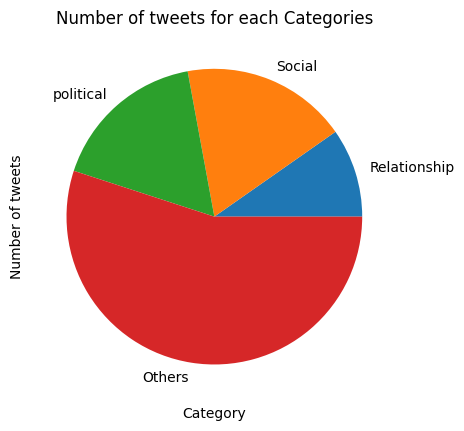

In [169]:
labels = ['Relationship', 'Social', 'political', 'Others']
values = [1043,1948,1832,5899]

plt.pie(values, labels = labels)
plt.title('Number of tweets for each Categories')
plt.xlabel('Category')
plt.ylabel('Number of tweets')
plt.show()

Bar Chart(1)

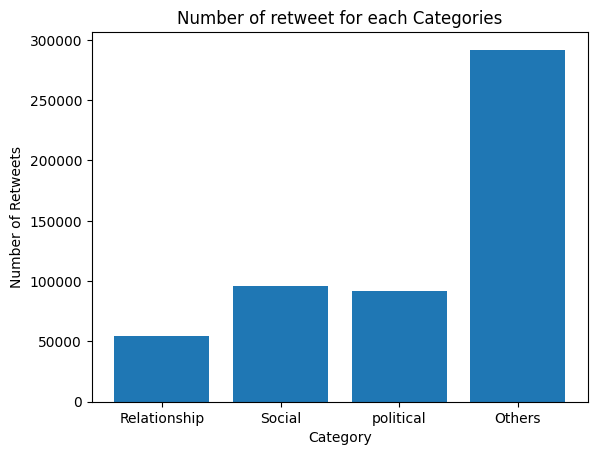

In [170]:
labels = ['Relationship', 'Social', 'political', 'Others']
values = [new_data['Sum of Retweets'][0],new_data['Sum of Retweets'][1],new_data['Sum of Retweets'][2],new_data['Sum of Retweets'][3]]

plt.bar(labels,values)
plt.title('Number of retweet for each Categories')
plt.xlabel('Category')
plt.ylabel('Number of Retweets')
plt.show()

Bar Chart(2)

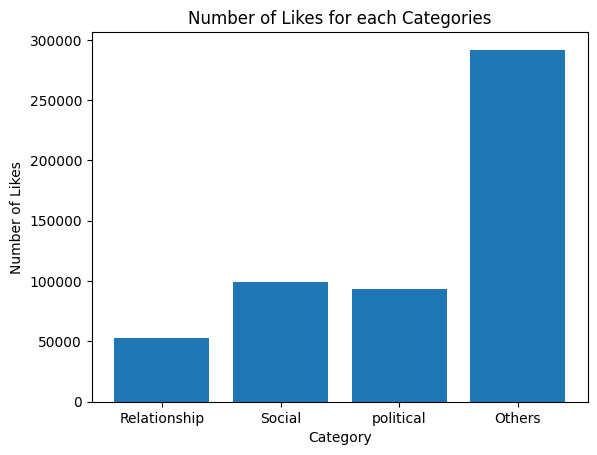

In [171]:
labels = ['Relationship', 'Social', 'political', 'Others']
values = [new_data['Sum of Likes'][0],new_data['Sum of Likes'][1],new_data['Sum of Likes'][2],new_data['Sum of Likes'][3]]

plt.bar(labels,values)
plt.title('Number of Likes for each Categories')
plt.xlabel('Category')
plt.ylabel('Number of Likes')
plt.show()

Export data

In [172]:
new_data.to_excel('Twitter_categorize.xlsx', index = False)